<a href="https://colab.research.google.com/github/akshaykumar2972/POC2025/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Personality Analysis**

### **Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

### **Importing the dataset**

In [2]:
df = pd.read_csv("marketing_campaign.csv", delimiter= '\t').drop_duplicates()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.iloc[:, :15].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15


In [4]:
df.iloc[:, 15:].head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### **Checking for NULL values**

In [7]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### **Handling NULL values**

In [8]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [9]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [10]:
df['Income'].isnull().sum()

np.int64(0)

### **Checking the Description of numeric columns for understanding the dataset distribution**

In [11]:
df.iloc[:, :15].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52248.748825,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,3246.662198,11.984069,25039.981052,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [12]:
df.iloc[:, 15:].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52248.748825,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,25039.981052,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


### **Checking the Description of Categorical columns for understanding the dataset distribution**

In [14]:
df.describe(include=['object'])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### **Feature Engineering**

#### **Renaming the columns**

In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
df.rename(columns={'ID': 'CustomerId',
    'Dt_Customer': 'EnrolledDate',
    'Recency': 'DaysSinceLastPurchase',

    'MntWines': 'AmountSpentOnWine',
    'MntFruits': 'AmountSpentOnFruits',
    'MntMeatProducts': 'AmountSpentOnMeatProducts',
    'MntFishProducts': 'AmountSpentOnFishProducts',
    'MntSweetProducts': 'AmountSpentOnSweetProducts',
    'MntGoldProds': 'AmountSpentOnGoldProducts',

    'NumDealsPurchases': 'PurchasesMadeWithDiscounts',
    'NumWebPurchases': 'PurchasesMadeViaWeb',
    'NumCatalogPurchases': 'PurchasesMadeViaCatalog',
    'NumStorePurchases': 'PurchasesMadeDirectly',
    'NumWebVisitsMonth': 'NumberOfVisitsToWebsitePerMonth',

    'AcceptedCmp1': 'IsCampaign1Accepted',
    'AcceptedCmp2': 'IsCampaign2Accepted',
    'AcceptedCmp3': 'IsCampaign3Accepted',
    'AcceptedCmp4': 'IsCampaign4Accepted',
    'AcceptedCmp5': 'IsCampaign5Accepted',

    'Complain': 'HasComplainedInLast2Months',
    'Response': 'IsLastCampaignAccepted'}, inplace=True)

#### **Feature Transformation**

In [17]:
df['EnrolledDate'] = pd.to_datetime(df['EnrolledDate'], format='%d-%m-%Y')

#### **Feature Creation**

In [18]:
df['Age'] = pd.Timestamp.today().date().year - df['Year_Birth']

In [19]:
df['TotalAmountSpent'] = df['AmountSpentOnWine'] + df['AmountSpentOnFruits'] + df['AmountSpentOnMeatProducts'] + df['AmountSpentOnFishProducts'] + df['AmountSpentOnSweetProducts'] + df['AmountSpentOnGoldProducts']
df['TotalPurchasesCount'] = df['PurchasesMadeViaWeb'] + df['PurchasesMadeViaCatalog'] + df['PurchasesMadeDirectly']
df['AverageSpendPerPurchase'] = round(df['TotalAmountSpent'] / df['TotalPurchasesCount'], 2)

In [20]:
df['Recency'] = pd.qcut(df['DaysSinceLastPurchase'], q=5, labels=[5, 4, 3, 2, 1])
df['Frequency'] = pd.qcut(df['TotalPurchasesCount'], q=5, labels=[1, 2, 3, 4, 5])
df['Monetary'] = pd.qcut(df['TotalAmountSpent'], q=5, labels=[1, 2, 3, 4, 5])

In [21]:
df['EnrolledDate'] = pd.to_datetime(df['EnrolledDate']).dt.date
today = pd.Timestamp.today()
df['NumberOfDaysAsCustomer'] = (today - pd.to_datetime(df['EnrolledDate'])).dt.days

In [22]:
df.iloc[:, -8:].head()

,Age,TotalAmountSpent,TotalPurchasesCount,AverageSpendPerPurchase,Recency,Frequency,Monetary,NumberOfDaysAsCustomer
0,68,1617,22,73.50,3,5,5,4629
1,71,27,4,6.75,4,1,1,4079
2,60,776,20,38.80,4,4,4,4278
3,41,53,6,8.83,4,2,1,4105
4,44,422,14,30.14,1,3,3,4127


<Axes: ylabel='Frequency'>

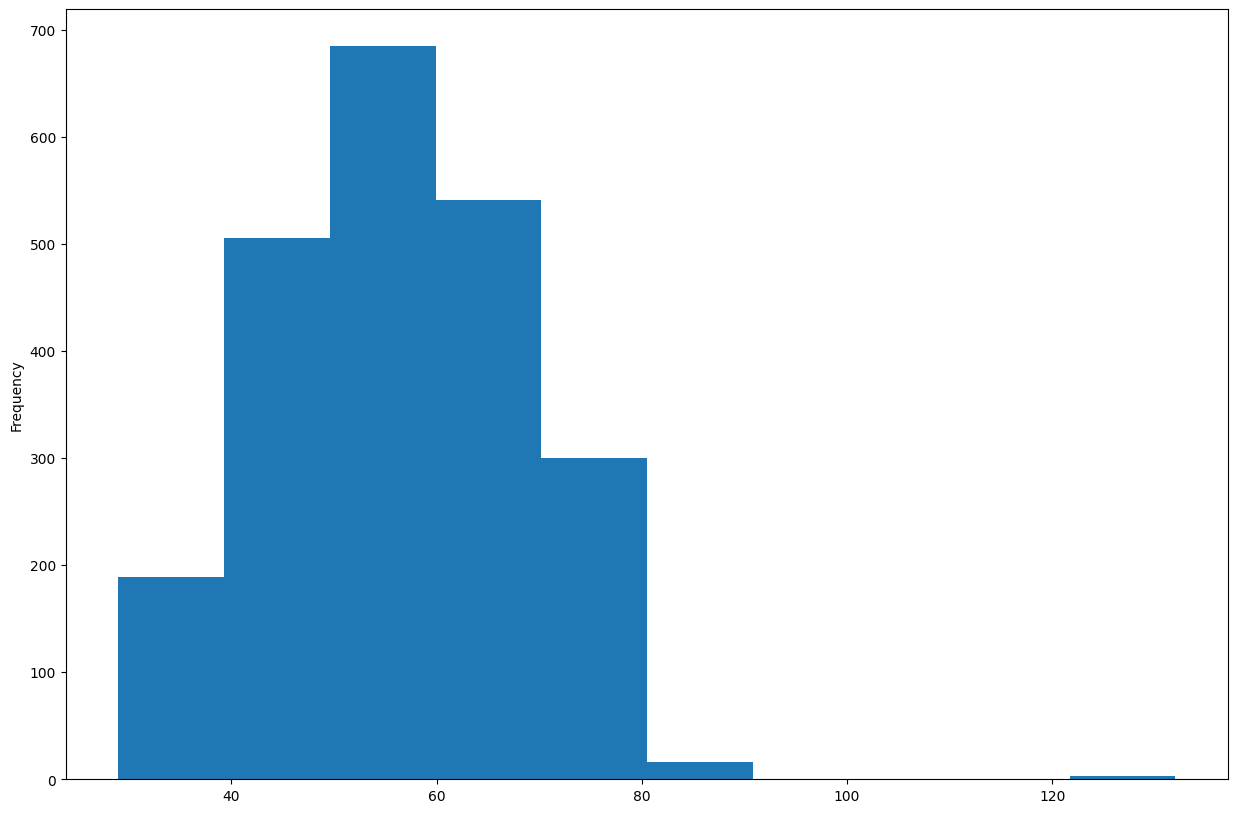

In [23]:
plt.figure(figsize=(15, 10))
df['Age'].plot(kind='hist')

In [24]:
df[df['Age'] > 100]

,CustomerId,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolledDate,DaysSinceLastPurchase,AmountSpentOnWine,...,Z_Revenue,IsLastCampaignAccepted,Age,TotalAmountSpent,TotalPurchasesCount,AverageSpendPerPurchase,Recency,Frequency,Monetary,NumberOfDaysAsCustomer
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,11,0,125,65,5,13.00,1,1,2,4242
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,11,0,132,22,3,7.33,4,1,1,4009
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,11,0,126,1853,14,132.36,4,3,5,4242


#### **Removing the outliers from Age column by considering only ages below 100**

In [25]:
df = df[df['Age'] <= 100]

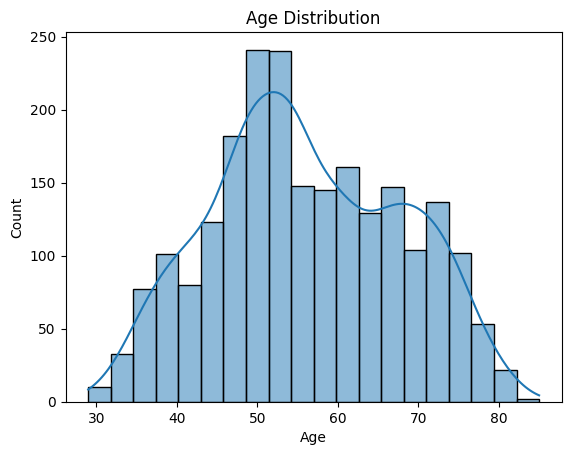

In [26]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

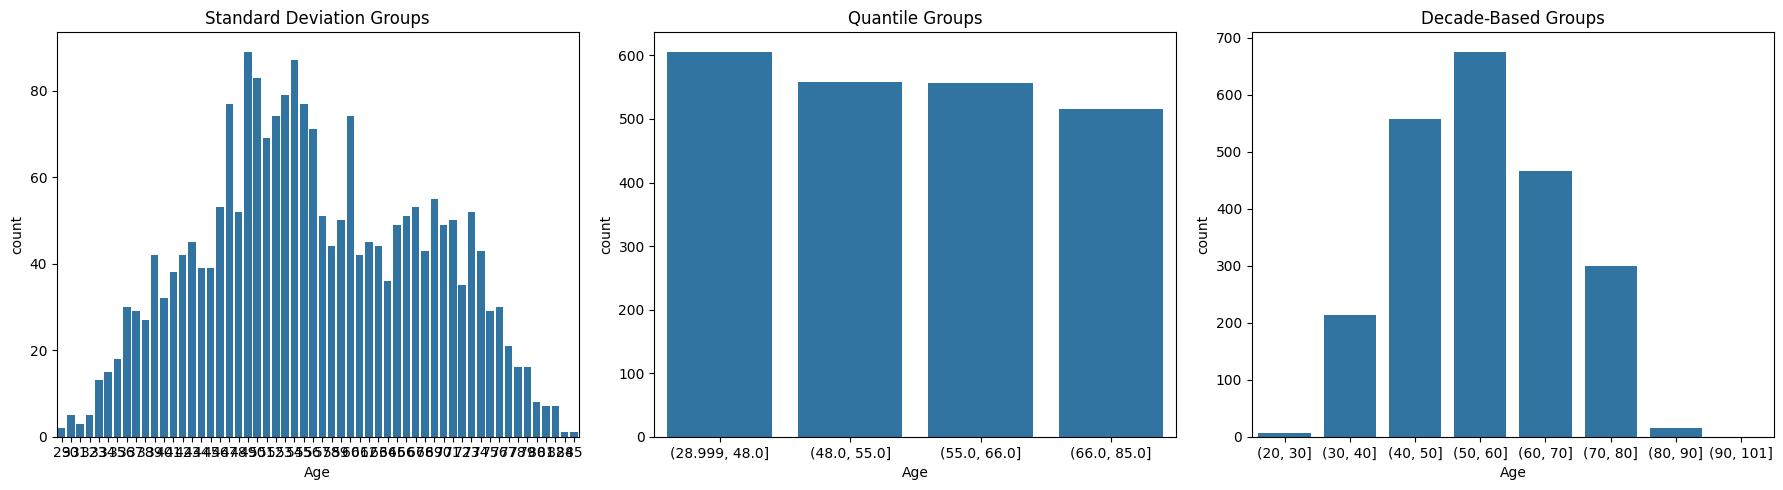

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Age', data=df, ax=axes[0])
axes[0].set_title('Standard Deviation Groups')

sns.countplot(x=pd.qcut(df['Age'], q=4), ax=axes[1])
axes[1].set_title('Quantile Groups')

sns.countplot(x=pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 101]), ax=axes[2])
axes[2].set_title('Decade-Based Groups')

plt.tight_layout()
plt.show()

In [28]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, 101]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

<Axes: xlabel='TotalAmountSpent', ylabel='TotalPurchasesCount'>

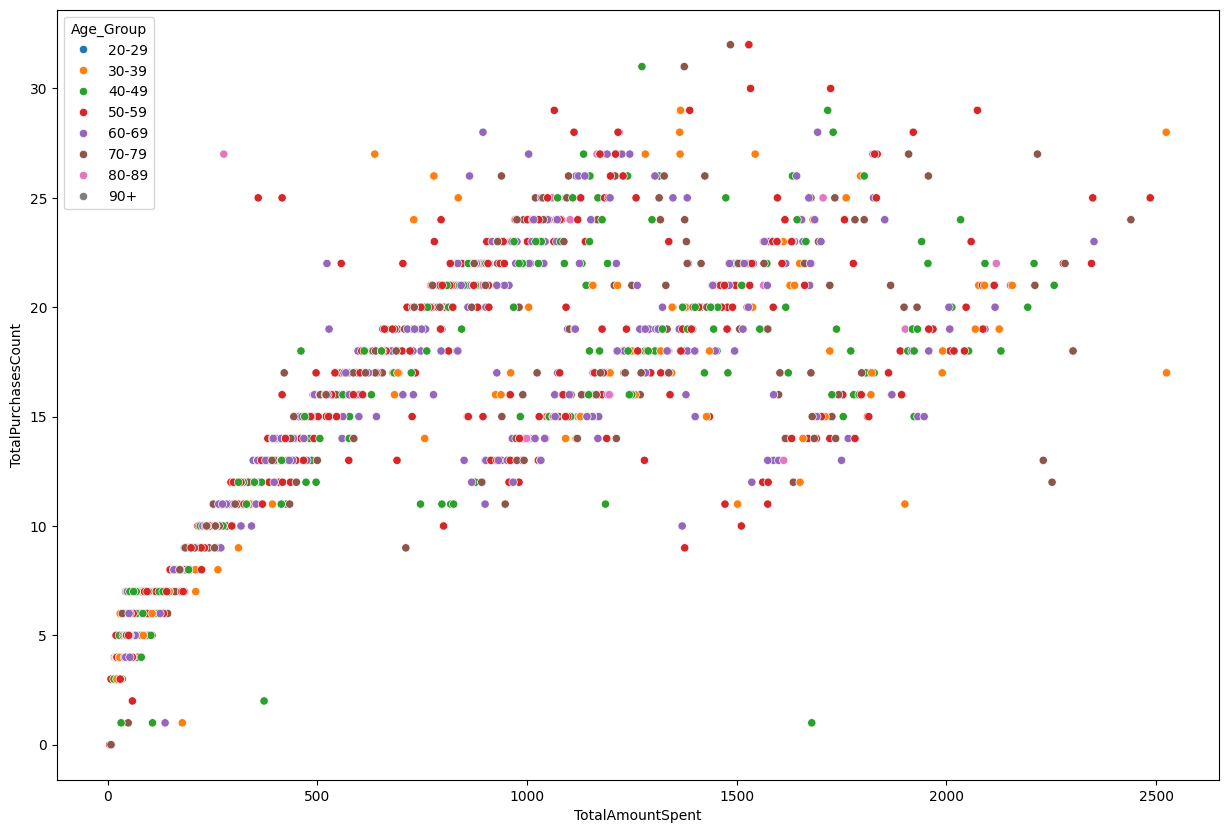

In [29]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='TotalAmountSpent', y='TotalPurchasesCount', data=df, hue='Age_Group')

<Axes: xlabel='TotalAmountSpent', ylabel='Income'>

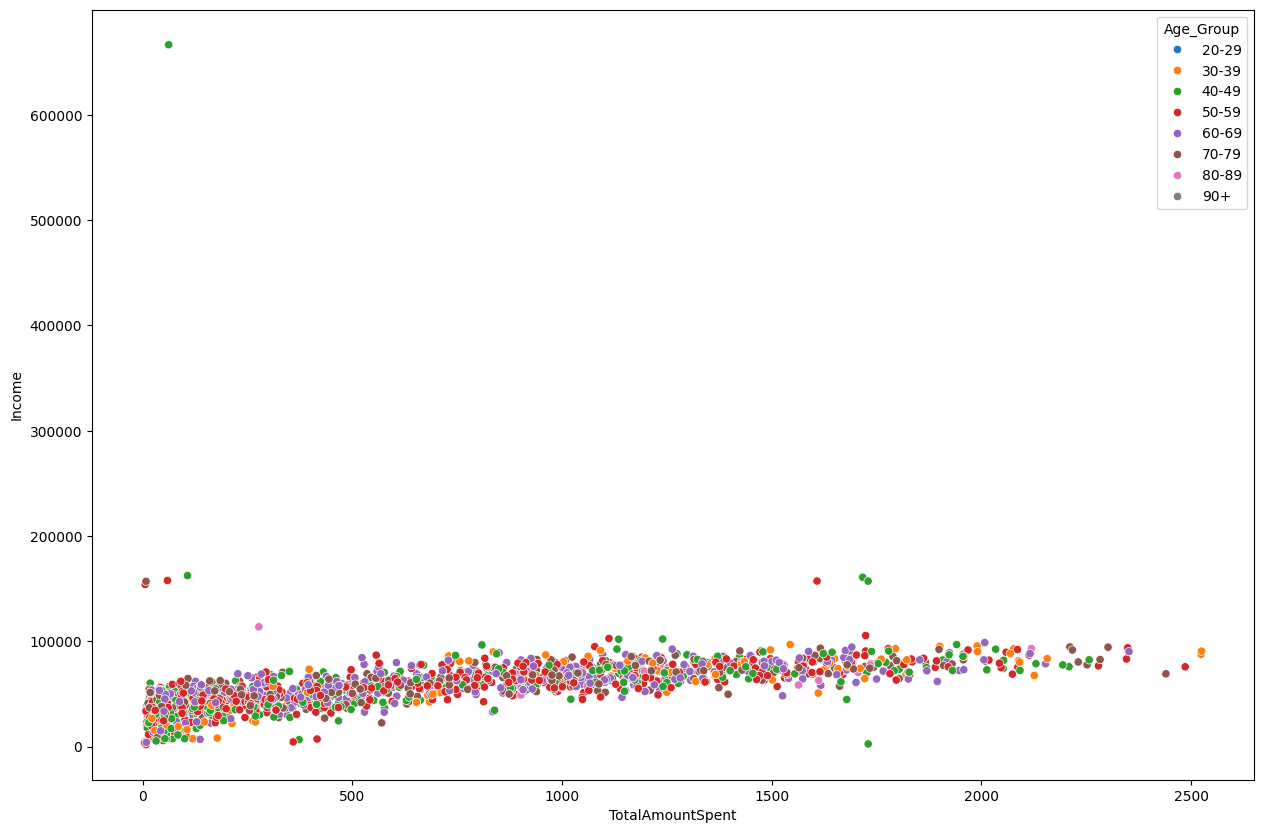

In [30]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='TotalAmountSpent', y='Income', data=df, hue='Age_Group')

In [31]:
df[df['Income'] > 300000]

,CustomerId,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolledDate,DaysSinceLastPurchase,AmountSpentOnWine,...,IsLastCampaignAccepted,Age,TotalAmountSpent,TotalPurchasesCount,AverageSpendPerPurchase,Recency,Frequency,Monetary,NumberOfDaysAsCustomer,Age_Group
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,48,62,7,8.86,4,2,2,4358,40-49


#### **Removing the outliers from Income column by considering only Income below 3,00,000 by taking reference of above plot**

In [32]:
df = df[df['Income'] <= 300000]

<Axes: xlabel='TotalAmountSpent', ylabel='Income'>

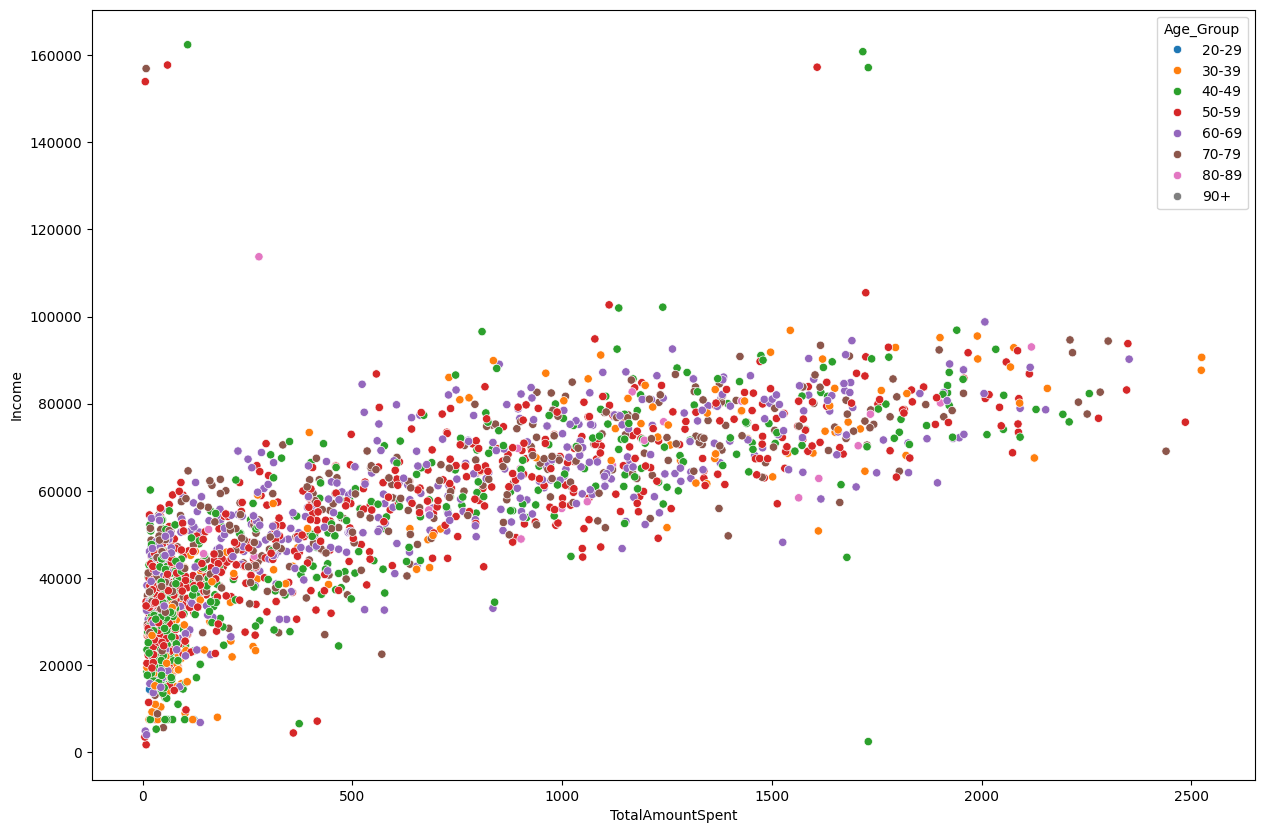

In [33]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='TotalAmountSpent', y='Income', data=df, hue='Age_Group')

#### **Dropping Z_CostContact & Z_Revenue features as these features doesn't add any real value**

In [34]:
df['Z_CostContact'].value_counts()

,count
Z_CostContact,
3,2236


In [35]:
df['Z_Revenue'].value_counts()

,count
Z_Revenue,
11,2236


In [36]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

In [37]:
df.iloc[:, :15].head()

,CustomerId,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolledDate,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15


In [38]:
df.iloc[:, 15:].head()

,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsCampaign1Accepted,IsCampaign2Accepted,...,IsLastCampaignAccepted,Age,TotalAmountSpent,TotalPurchasesCount,AverageSpendPerPurchase,Recency,Frequency,Monetary,NumberOfDaysAsCustomer,Age_Group
0,3,8,10,4,7,0,0,0,0,0,...,1,68,1617,22,73.50,3,5,5,4629,60-69
1,2,1,1,2,5,0,0,0,0,0,...,0,71,27,4,6.75,4,1,1,4079,70-79
2,1,8,2,10,4,0,0,0,0,0,...,0,60,776,20,38.80,4,4,4,4278,60-69
3,2,2,0,4,6,0,0,0,0,0,...,0,41,53,6,8.83,4,2,1,4105,40-49
4,5,5,3,6,5,0,0,0,0,0,...,0,44,422,14,30.14,1,3,3,4127,40-49


#### **Creating the OfferAccepted column to know if the Customer has accepted the offer in any of the Campaigns**

In [39]:
selected_columns = ['IsCampaign1Accepted', 'IsCampaign2Accepted', 'IsCampaign3Accepted', 'IsCampaign4Accepted', 'IsCampaign5Accepted']
df['OfferAccepted'] = df[selected_columns].apply(lambda row: 1 if any(row) else 0, axis=1)

In [40]:
sns.set(style="whitegrid")
groups = [['AmountSpentOnWine'], ['AmountSpentOnFruits'], ['AmountSpentOnMeatProducts'], ['AmountSpentOnFishProducts'], ['AmountSpentOnSweetProducts'], ['AmountSpentOnGoldProducts']]

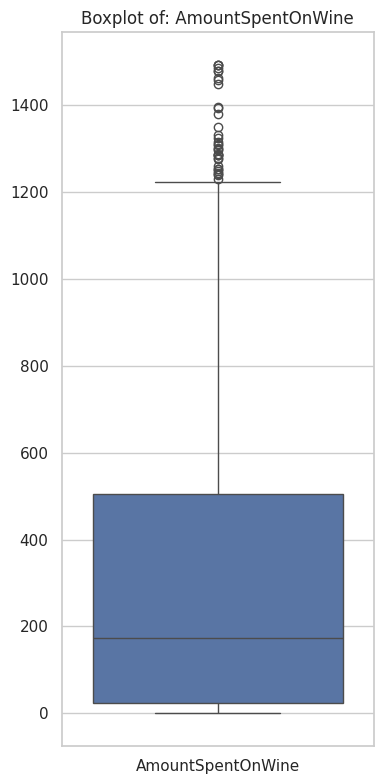

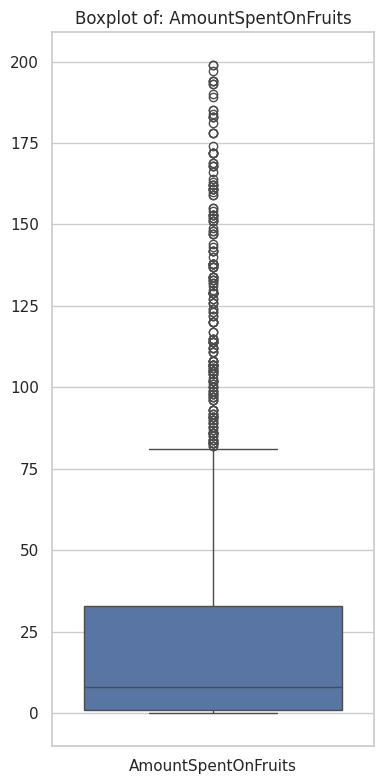

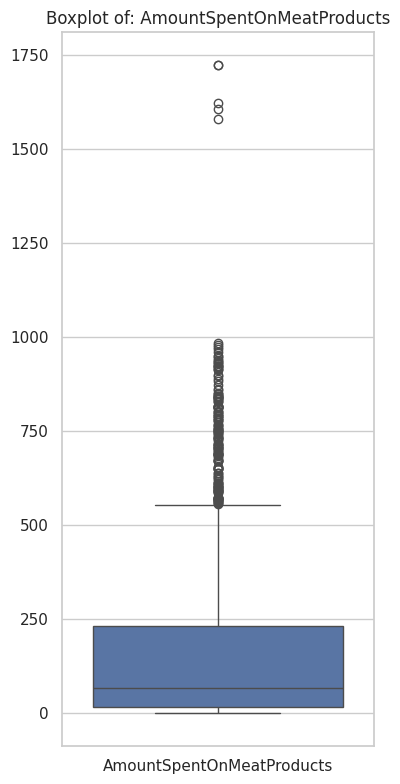

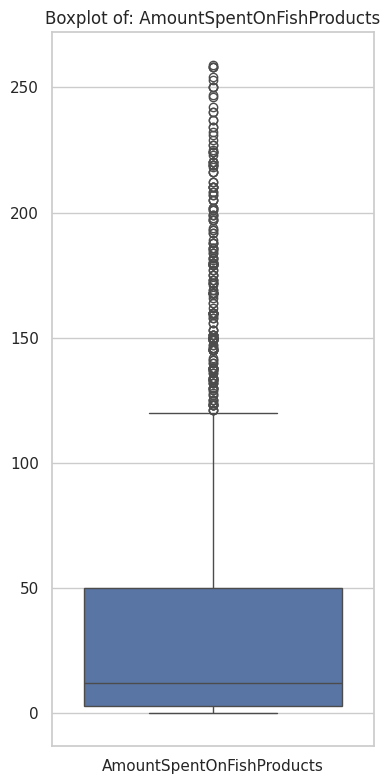

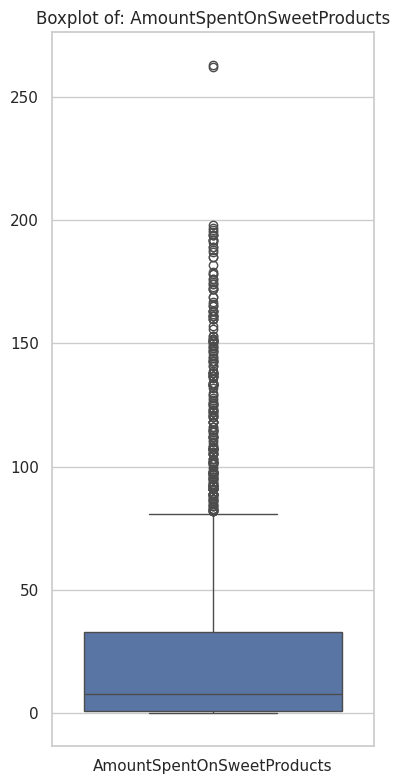

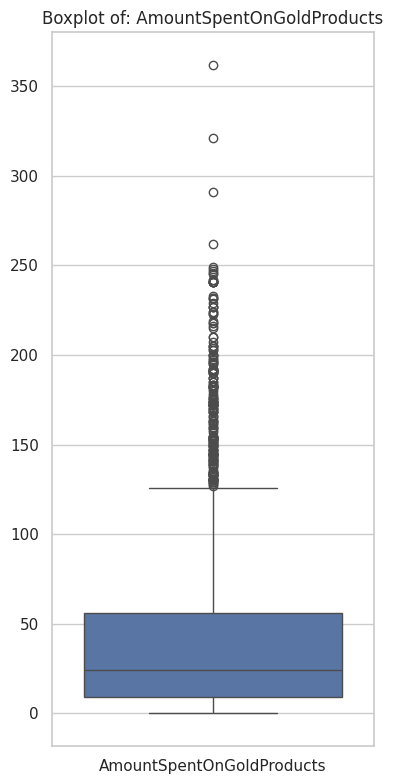

In [41]:
for i, group in enumerate(groups, 1):
    plt.figure(figsize=(4, 8))
    sns.boxplot(data=df[group])
    plt.title(f"Boxplot of: {', '.join(group)}")
    plt.tight_layout()
    plt.show()

<Axes: ylabel='Frequency'>

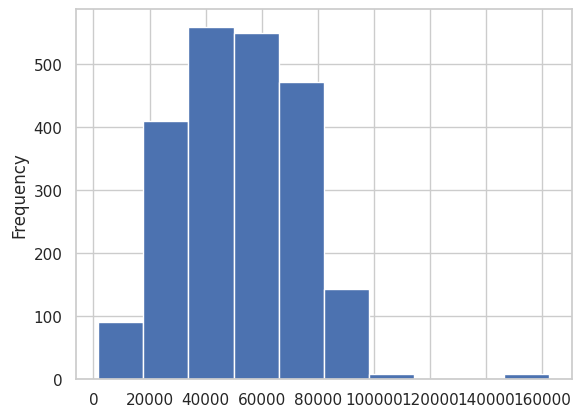

In [42]:
plt.figsize=(20, 8)
df['Income'].plot(kind='hist')

In [43]:
df['IncomeSegment'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Lower-Mid', 'Upper-Mid', 'High'])

In [44]:
df.groupby('IncomeSegment')['Income'].agg(['min', 'mean', 'max']).astype(int)

,min,mean,max
IncomeSegment,,,
Low,1730,25278,35441
Lower-Mid,35523,43278,51369
Upper-Mid,51373,59922,68274
High,68281,79374,162397


In [45]:
df.to_csv('Marketind Dataset all columns.csv', index=False)

## **Clustering**

In [46]:
df.columns

Index(['CustomerId', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'EnrolledDate', 'DaysSinceLastPurchase',
       'AmountSpentOnWine', 'AmountSpentOnFruits', 'AmountSpentOnMeatProducts',
       'AmountSpentOnFishProducts', 'AmountSpentOnSweetProducts',
       'AmountSpentOnGoldProducts', 'PurchasesMadeWithDiscounts',
       'PurchasesMadeViaWeb', 'PurchasesMadeViaCatalog',
       'PurchasesMadeDirectly', 'NumberOfVisitsToWebsitePerMonth',
       'IsCampaign3Accepted', 'IsCampaign4Accepted', 'IsCampaign5Accepted',
       'IsCampaign1Accepted', 'IsCampaign2Accepted',
       'HasComplainedInLast2Months', 'IsLastCampaignAccepted', 'Age',
       'TotalAmountSpent', 'TotalPurchasesCount', 'AverageSpendPerPurchase',
       'Recency', 'Frequency', 'Monetary', 'NumberOfDaysAsCustomer',
       'Age_Group', 'OfferAccepted', 'IncomeSegment'],
      dtype='object')

#### **Dropping all columns which doesn't add any value for further and created for understanding the dataset**

In [47]:
df.drop(columns=['CustomerId'
                , 'EnrolledDate'
                , 'Year_Birth'
                , 'Age_Group'
                , 'TotalAmountSpent'
                , 'TotalPurchasesCount'
                , 'AverageSpendPerPurchase'
                , 'Recency'
                , 'Frequency'
                , 'Monetary'
                , 'NumberOfDaysAsCustomer'
                , 'Age_Group'
                , 'OfferAccepted'
                , 'IncomeSegment'], inplace=True, axis=1)

In [48]:
df.iloc[:, :15].head()

,Education,Marital_Status,Income,Kidhome,Teenhome,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3


In [49]:
df.iloc[:, 15:].head()

,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsCampaign1Accepted,IsCampaign2Accepted,HasComplainedInLast2Months,IsLastCampaignAccepted,Age
0,4,7,0,0,0,0,0,0,1,68
1,2,5,0,0,0,0,0,0,0,71
2,10,4,0,0,0,0,0,0,0,60
3,4,6,0,0,0,0,0,0,0,41
4,6,5,0,0,0,0,0,0,0,44


### **Encoding Categorical Variables**

In [50]:
df['Education'].value_counts()

,count
Education,
Graduation,1126
PhD,485
Master,370
2n Cycle,201
Basic,54


In [51]:
education_order = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education'] = df['Education'].map(education_order)

In [52]:
df.drop(columns=['Education'], inplace=True, axis=1)

In [53]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,578
Single,479
Divorced,231
Widow,77
Alone,3
Absurd,2
YOLO,2


In [54]:
# Replace categories with 'Married' and 'Single' accordingly
df['Marital_Status'] = df['Marital_Status'].replace(
    {
    'Together': 'Married',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
    }
    )

In [55]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,1442
Single,794


In [56]:
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

In [57]:
df['Marital_Status_Single'] = df['Marital_Status_Single'].astype(int)

In [58]:
df.rename(columns={'Marital_Status_Single': 'IsSingle'}, inplace=True)

In [59]:
df.iloc[:, :15].head()

,Income,Kidhome,Teenhome,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [60]:
df.iloc[:, 15:].head()

,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsCampaign1Accepted,IsCampaign2Accepted,HasComplainedInLast2Months,IsLastCampaignAccepted,Age,IsSingle
0,0,0,0,0,0,0,1,68,1
1,0,0,0,0,0,0,0,71,1
2,0,0,0,0,0,0,0,60,0
3,0,0,0,0,0,0,0,41,0
4,0,0,0,0,0,0,0,44,0


In [61]:
df.shape

(2236, 24)

In [62]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'DaysSinceLastPurchase',
       'AmountSpentOnWine', 'AmountSpentOnFruits', 'AmountSpentOnMeatProducts',
       'AmountSpentOnFishProducts', 'AmountSpentOnSweetProducts',
       'AmountSpentOnGoldProducts', 'PurchasesMadeWithDiscounts',
       'PurchasesMadeViaWeb', 'PurchasesMadeViaCatalog',
       'PurchasesMadeDirectly', 'NumberOfVisitsToWebsitePerMonth',
       'IsCampaign3Accepted', 'IsCampaign4Accepted', 'IsCampaign5Accepted',
       'IsCampaign1Accepted', 'IsCampaign2Accepted',
       'HasComplainedInLast2Months', 'IsLastCampaignAccepted', 'Age',
       'IsSingle'],
      dtype='object')

### **Feature Transformation: Scaling the features using StandardScaler**

In [63]:
flag_cols = ['Kidhome'
            , 'Teenhome'
            , 'IsCampaign1Accepted'
            , 'IsCampaign2Accepted'
            , 'IsCampaign3Accepted'
            , 'IsCampaign4Accepted'
            , 'IsCampaign5Accepted'
            , 'IsLastCampaignAccepted'
            , 'HasComplainedInLast2Months'
            , 'IsSingle']
cols_to_scale = ['Income'
                , 'DaysSinceLastPurchase'
                , 'AmountSpentOnWine'
                ,	'AmountSpentOnFruits'
                ,	'AmountSpentOnMeatProducts'
                ,	'AmountSpentOnFishProducts'
                ,	'AmountSpentOnSweetProducts'
                , 'AmountSpentOnGoldProducts'
                , 'PurchasesMadeWithDiscounts'
                ,	'PurchasesMadeViaWeb'
                ,	'PurchasesMadeViaCatalog'
                ,	'PurchasesMadeDirectly'
                ,	'NumberOfVisitsToWebsitePerMonth'
                , 'Age']

In [64]:
df['Id'] = range(1, len(df) + 1)

In [65]:
flags_df = df[['Id'] + flag_cols].copy()
to_scale_df = df[['Id'] + cols_to_scale].copy()

In [66]:
flags_df.head()

,Id,Kidhome,Teenhome,IsCampaign1Accepted,IsCampaign2Accepted,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsLastCampaignAccepted,HasComplainedInLast2Months,IsSingle
0,1,0,0,0,0,0,0,0,1,0,1
1,2,1,1,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,0


In [67]:
to_scale_df.head()

,Id,Income,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth,Age
0,1,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,68
1,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,71
2,3,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,60
3,4,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,41
4,5,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,44


In [68]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(to_scale_df[cols_to_scale])

In [69]:
scaled_df = pd.DataFrame(scaled_array, columns=cols_to_scale)

In [70]:
scaled_df['Id'] = to_scale_df['Id']

In [71]:
df_final = pd.merge(scaled_df, flags_df, on='Id')

In [72]:
df_final.drop('Id', axis=1, inplace=True)

In [73]:
df_final.iloc[:, :15].head()

,Income,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth,Age,Kidhome
0,0.288408,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,1.016868,0
1,-0.262476,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,1.273264,1
2,0.917811,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,0.333146,0
3,-1.182548,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-1.290693,1
4,0.295648,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-1.034298,1


In [74]:
df_final.iloc[:, 15:].head()

,Teenhome,IsCampaign1Accepted,IsCampaign2Accepted,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsLastCampaignAccepted,HasComplainedInLast2Months,IsSingle
0,0,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


<Axes: >

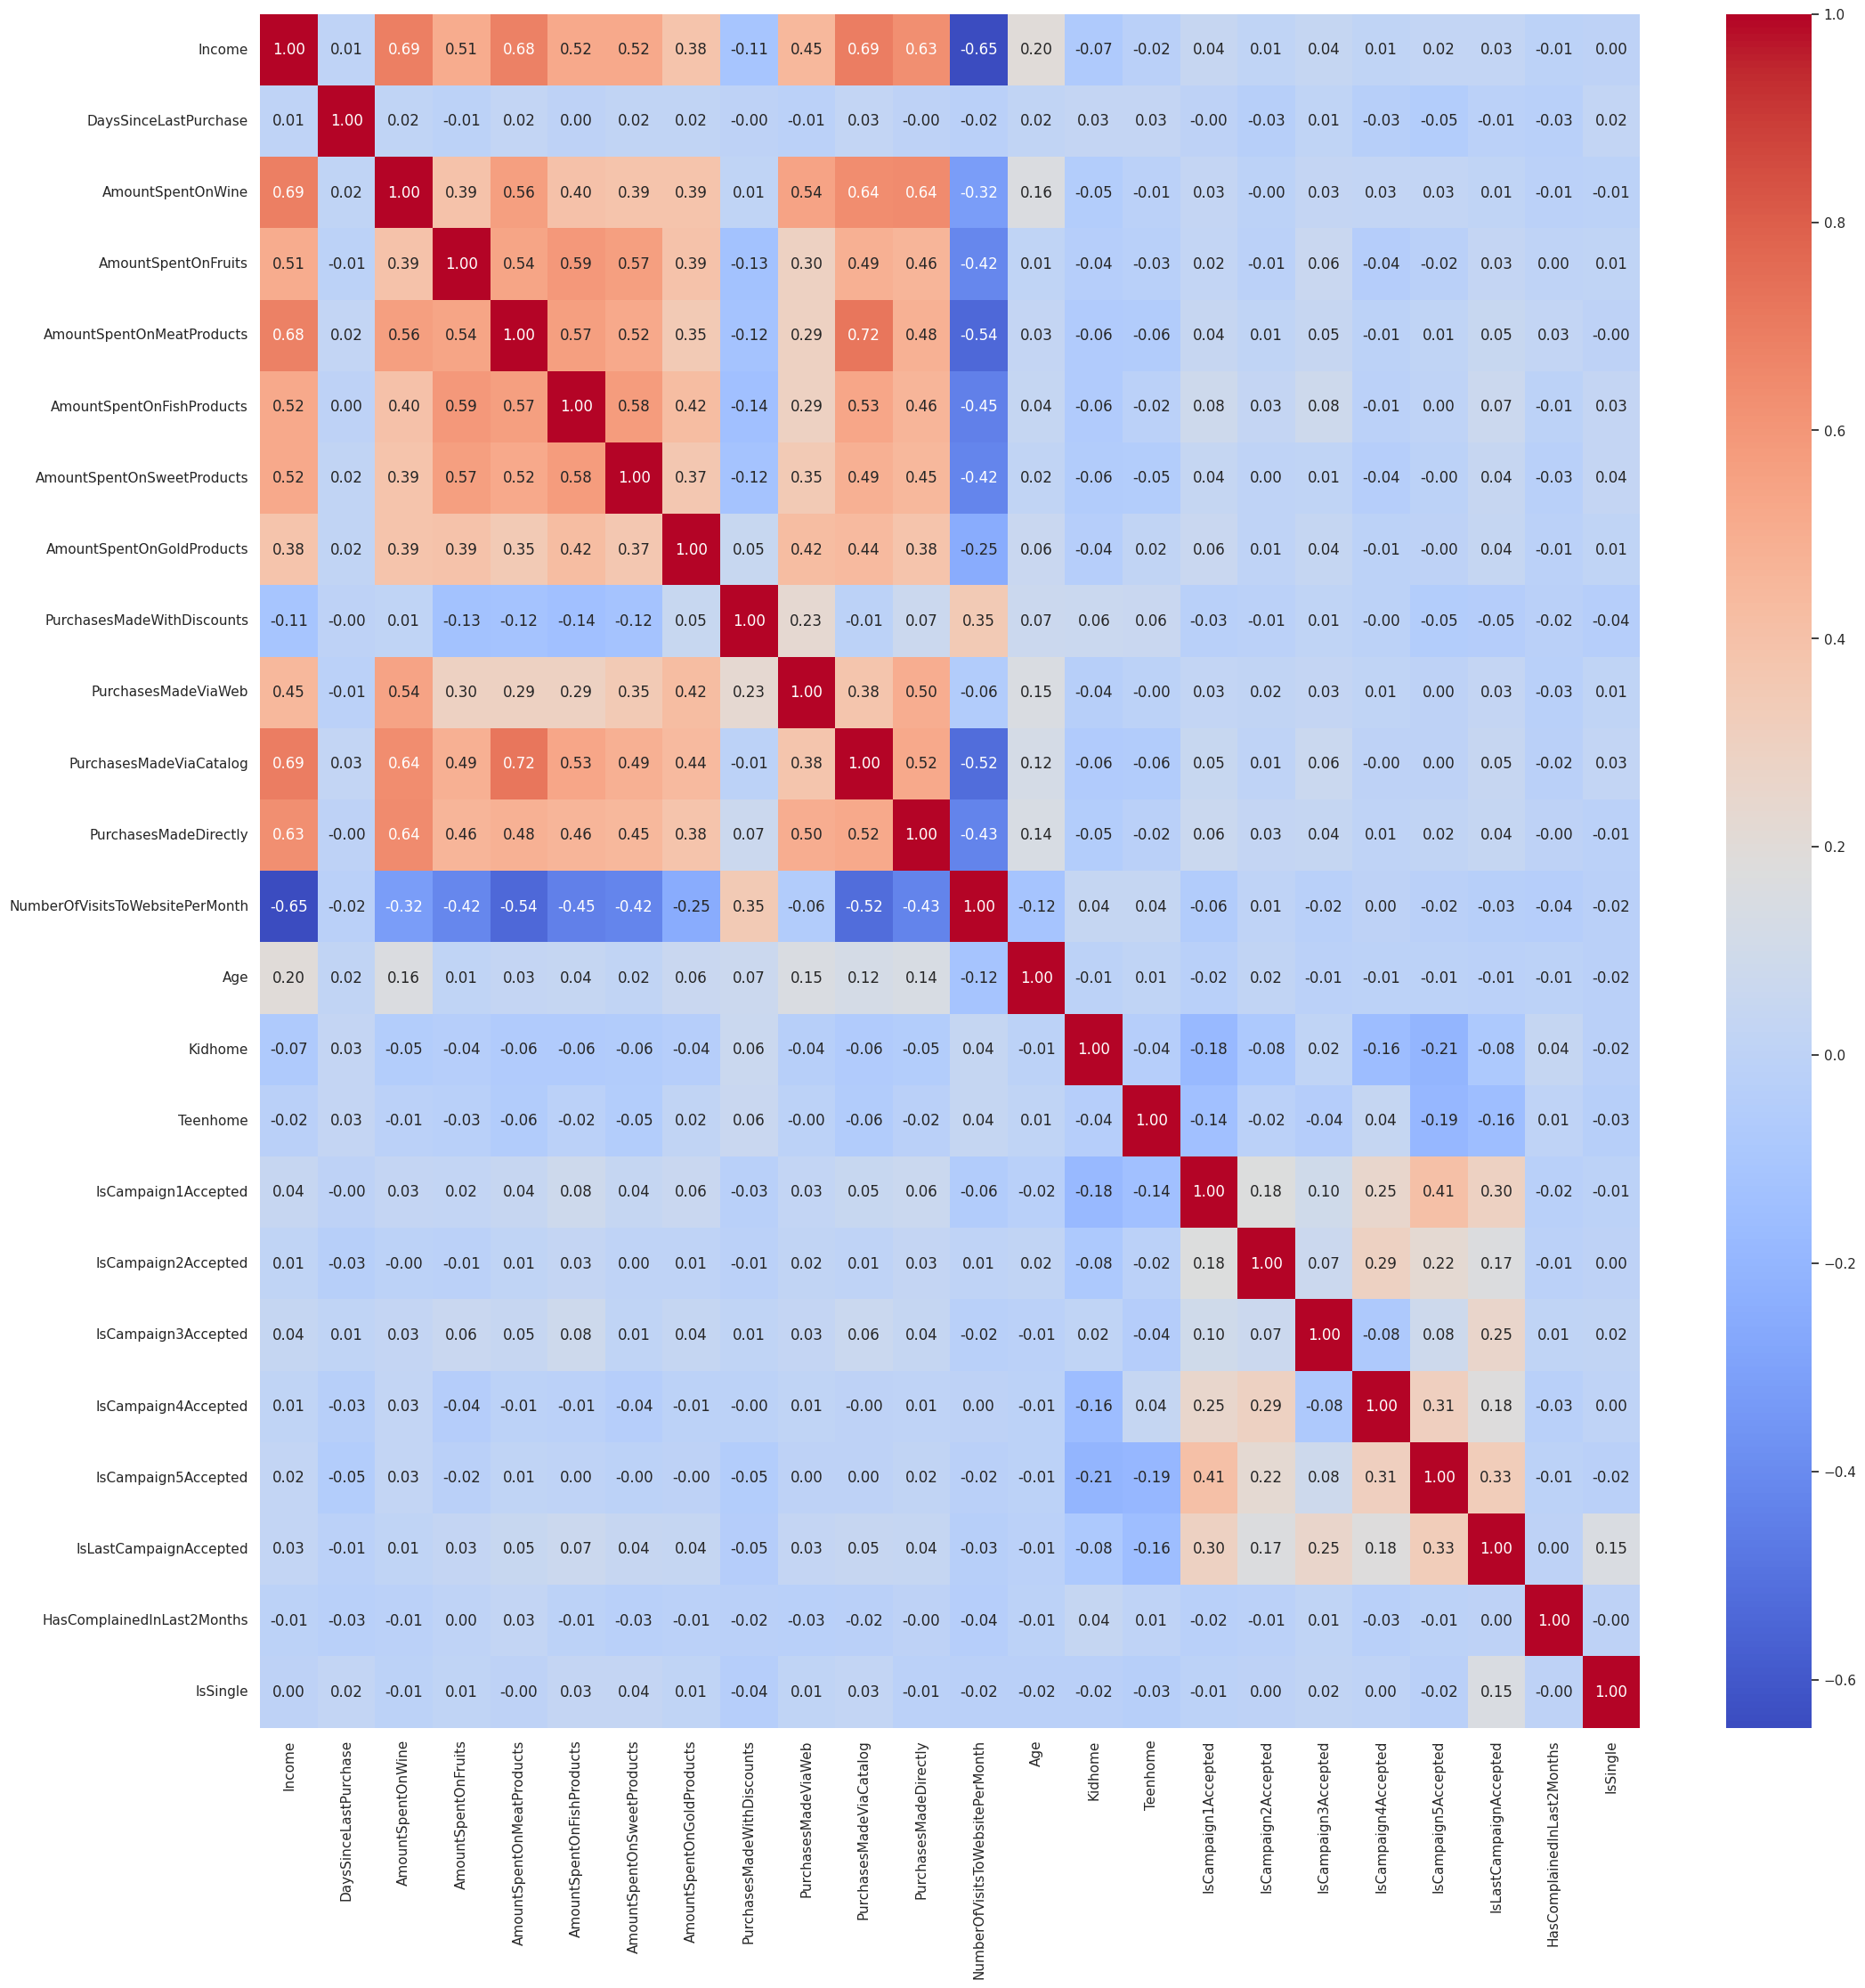

In [76]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [77]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

# # Step 1: Create features that are good predictors of income
# df['Age'] = 2025 - df['Year_Birth']
# df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# # Step 2: Select relevant columns
# features = ['Age', 'Education', 'Marital_Status', 'TotalChildren', 'Recency']
# df_model = df[features + ['Income']].copy()

# # Step 3: Encode categorical features
# df_model = pd.get_dummies(df_model, columns=['Education', 'Marital_Status'], drop_first=True)

# # Step 4: Split known and missing
# train_data = df_model[df_model['Income'].notnull()]
# predict_data = df_model[df_model['Income'].isnull()]

# # Step 5: Train model
# X_train = train_data.drop('Income', axis=1)
# y_train = train_data['Income']
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Step 6: Predict missing values
# X_pred = predict_data.drop('Income', axis=1)
# predicted_income = model.predict(X_pred)

# # Step 7: Fill back the predictions
# df.loc[df['Income'].isnull(), 'Income'] = predicted_income

In [78]:
X_scaled = df_final.copy()

In [79]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [80]:
pca.explained_variance_

array([5.83301307, 1.58051256, 1.08404471, 0.998618  , 0.80017808,
       0.6745756 , 0.62772829, 0.51880513, 0.45283331, 0.40171496,
       0.35622913, 0.31493602, 0.29893279, 0.26532076, 0.24577955,
       0.22514493, 0.17987276, 0.14141949, 0.07874314, 0.05537042,
       0.04511415, 0.03687376, 0.01142751, 0.00878134])

In [81]:
pca.explained_variance_ratio_

array([0.38284489, 0.10373561, 0.07115036, 0.06554345, 0.05251901,
       0.0442752 , 0.04120042, 0.03405134, 0.02972133, 0.02636622,
       0.0233808 , 0.02067056, 0.0196202 , 0.0174141 , 0.01613153,
       0.0147772 , 0.0118058 , 0.00928195, 0.00516824, 0.00363419,
       0.00296103, 0.00242018, 0.00075003, 0.00057636])

In [82]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[0.38284489 0.4865805  0.55773086 0.62327431 0.67579332 0.72006852
 0.76126894 0.79532028 0.82504161 0.85140783 0.87478863 0.89545919
 0.91507939 0.93249349 0.94862503 0.96340223 0.97520802 0.98448997
 0.98965821 0.9932924  0.99625343 0.99867361 0.99942364 1.        ]


Text(0.5, 1.0, 'Cumulative Explained Variance vs. Number of Components')

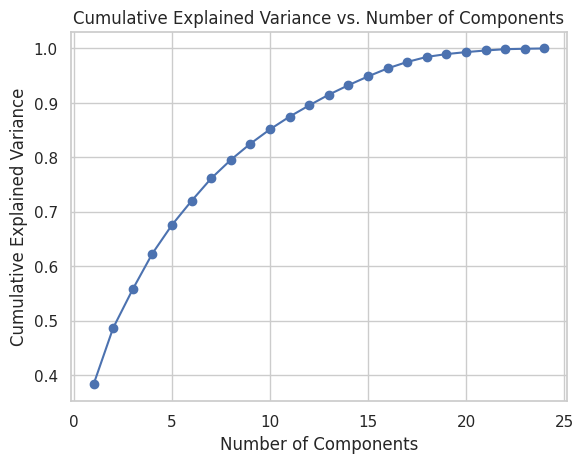

In [83]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')

In [84]:
n_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components for 90% variance: {n_components}")

Number of components for 90% variance: 13


In [85]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [86]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=101, n_init=10)
clusters = kmeans.fit_predict(X_pca)

In [87]:
df_final['cluster'] = clusters

In [92]:
df_final.iloc[:,-1:].head()

,cluster
0,0
1,2
2,3
3,2
4,1


In [89]:
print("Cluster distribution:")
df_final['cluster'].value_counts()

Cluster distribution:


,count
cluster,
2,1007
1,501
3,432
0,292


In [90]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

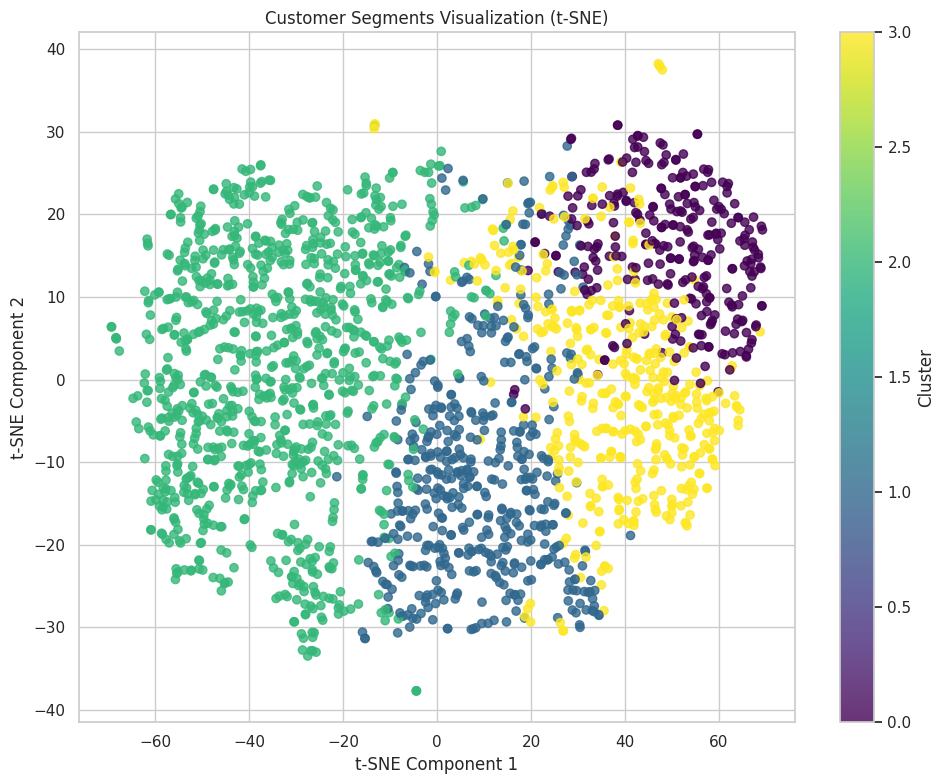

In [91]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.title('Customer Segments Visualization (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()